#  이미지 윤곽 추출
- findContours() 사용

In [1]:
!curl https://raw.githubusercontent.com/StillWork/data/master/im-circle-box.png\
    -o im-circle.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  180k  100  180k    0     0   355k      0 --:--:-- --:--:-- --:--:--  356k


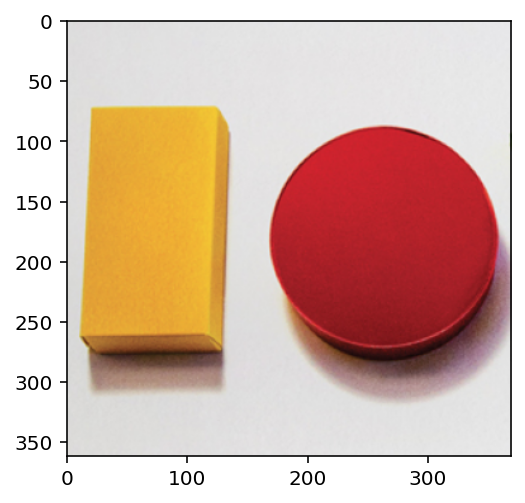

In [2]:
import cv2
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

img = cv2.imread("im-circle.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 윤곽선 추출
- 이미지를 그레이로 스케일링하고 블러 처리한다 (노이지를 없앰)
- 이미지를 흑백을 이진화 코딩한다 (threshold() 사용)
- findContour()로 경계를 검출한다

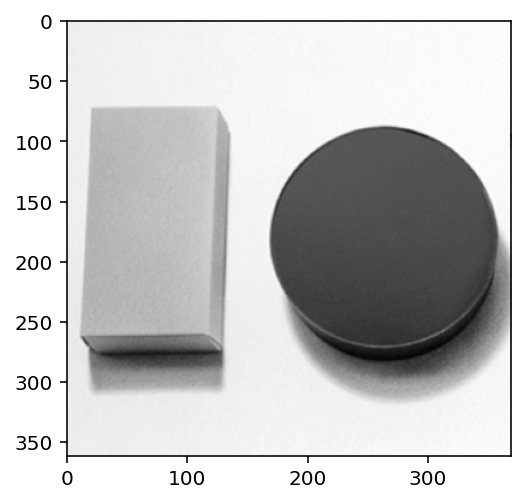

In [3]:
gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray1, cmap="gray")

## findContours
- 인자는, 이미지, 검출모드, 윤곽추출방법이다.
- 리턴값은, 윤곽이미지, 윤곽리스트, 계층정보 3가지이다.
- LIST는 단순한 윤곽 검출을 한다

167 86 203 231
10 72 126 239


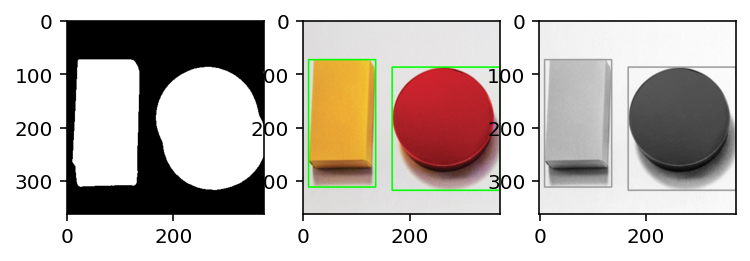

In [14]:
# 블러용 필터 크기는 홀수로 지정한다, 표준편차는 0으로 지정하면 자동으로 생성한다
gray = cv2.GaussianBlur(gray1, (7, 7), 0) 
# 흑백으로 만든다, 역치값과, 대체값을 지정한다 
im2 = cv2.threshold(gray, 200, 50, cv2.THRESH_BINARY_INV)[1]

# 변환한 이미지 출력하기
plt.subplot(1, 3, 1)
plt.imshow(im2, cmap="gray")

# 윤곽 검출하기 
cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[0]

for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    # 너무 크거나 너무 작은 부분 제거하기
    if w < 10 : continue
    print(x,y,w,h) # 결과 출력하기
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 화면 오른쪽에 결과 출력하기
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap="gray")
plt.show()

In [5]:
len(cnts)

3

In [6]:
#  총 몇개의 윤곽선을 찾았는지 조사
import numpy as np
a = np.asarray(cnts)
a.shape

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(3,)

## 객체 검출 응용 - 우편번호 찾기

In [15]:
# 엽서 이미지에서 우편 번호를 추출하는 함수
def detect_zipno(fname):
    img = cv2.imread(fname)
    h, w = img.shape[:2]
    # 이미지의 오른쪽 윗부분만 추출하기
    img = img[0:h//2, w//3:]
    
    # 이미지 이진화
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0) 
    im2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]
    
    # 윤곽 검출
    cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[1]
    
    # 추출한 이미지에서 윤곽 추출
    result = []
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        # 너무 크거나 너무 작은 부분 제거
        if not(50 < w < 70): continue
        result.append([x, y, w, h])
    # 추출한 윤곽을 위치에 따라 정렬
    result = sorted(result, key=lambda x: x[0])
    # 추출한 윤곽이 너무 가까운 것들 제거
    result2 = []
    lastx = -100
    for x, y, w, h in result:
        if (x - lastx) < 10: continue
        result2.append([x, y, w, h])
        lastx = x
    # 초록색 테두리 출력
    for x, y, w, h in result2:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    return result2, img

In [16]:
def detect_no(fname):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0) 
    im2 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)[1]
    
    # 윤곽 검출
    cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[0]
    
    result = []
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        if not(20 < w < 100): continue
        result.append([x, y, w, h])
    # 추출한 윤곽을 위치에 따라 정렬
    result = sorted(result, key=lambda x: x[0])
   # 테두리 출력하기
    for x, y, w, h in result:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    return result, img

- 우편엽서 이미지

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 50029  100 50029    0     0  46581      0  0:00:01  0:00:01 --:--:-- 46581


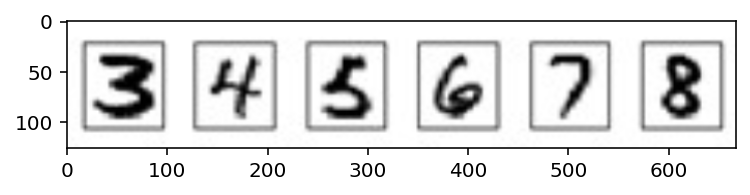

In [17]:
!curl https://raw.githubusercontent.com/StillWork/data/master/im-post.png\
    -o im-post.png
img = cv2.imread("im-post.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar inste

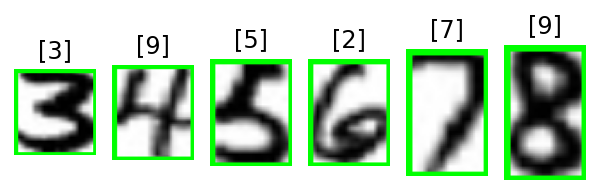

In [18]:
import joblib
clf = joblib.load("digits.pkl")

cnts, img = detect_no("im-post.png")
for i, pt in enumerate(cnts):
    x, y, w, h = pt
    im2 = img[y:y+h, x:x+w]
    im2gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) # 그레이스케일
    im2gray = cv2.resize(im2gray, (8, 8)) # 크기 변경
    im2gray = 15 - im2gray // 16 # 흑백 반전
    im2gray = im2gray.reshape((-1, 64)) # 차원 변환
    res = clf.predict(im2gray)
    plt.subplot(1, 7, i + 1)
    plt.imshow(im2)
    plt.axis("off")
    plt.title(res)

plt.show()